# Predicting heart disease using machine learning


## steps
###### 1 problem defination
###### 2 data
###### 3 evaluation
###### 4 features
###### 5 modelling
###### 6 experimentation

# 1 problem defiantion
here we want to try to create a model that can calssify if a person has heart disease or not

# 2 data

this data is taken from kaggel, it is a version of UCI's original data set

# 3 evaluation 

we need high accuracy (lets aim for atleast 95% accuracy)

# 4 features 
about the data (from kaggel)

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [1]:
# importing tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

 # Loading data

In [2]:
df = pd.read_csv("heart-disease.csv")
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


we have 14 features and we have 300+ instance 

# data exploration(EDA exploratory data analysis)




In [3]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

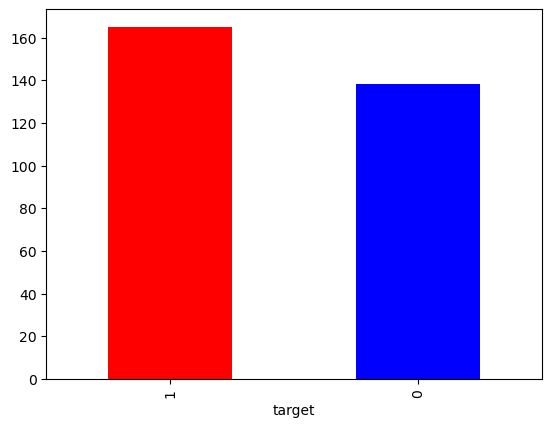

In [4]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# are there any missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## heart disease frequency in relation to sex

In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

 207 male , 96 female


In [9]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


based on this data 72/96 female has heart disease
,93/207 male has heart disease

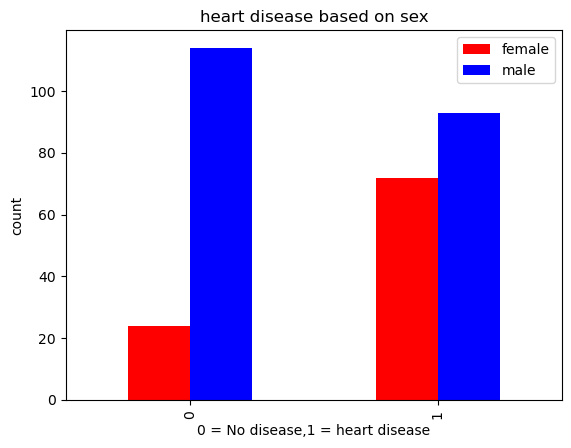

In [10]:
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["red","blue"])
plt.title("heart disease based on sex")
plt.xlabel("0 = No disease,1 = heart disease")
plt.ylabel("count")
plt.legend(["female","male"]);

age vs max hear rate for heart disease

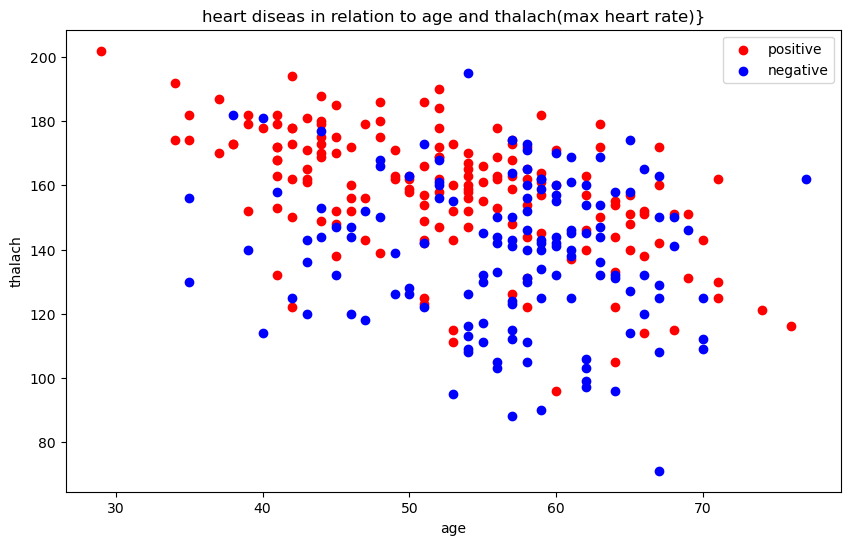

In [11]:
plt.figure(figsize=(10,6))

# for positive patients
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red");
# for negative patients
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="blue");

plt.title("heart diseas in relation to age and thalach(max heart rate)}")
plt.xlabel("age")
plt.ylabel("thalach")
plt.legend(["positive","negative"]);

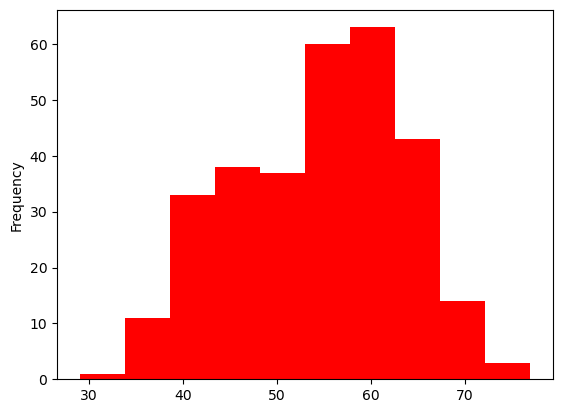

In [12]:
df.age.plot.hist(color="red");

so age distribution is kind of like a normal distibution

In [13]:
# correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


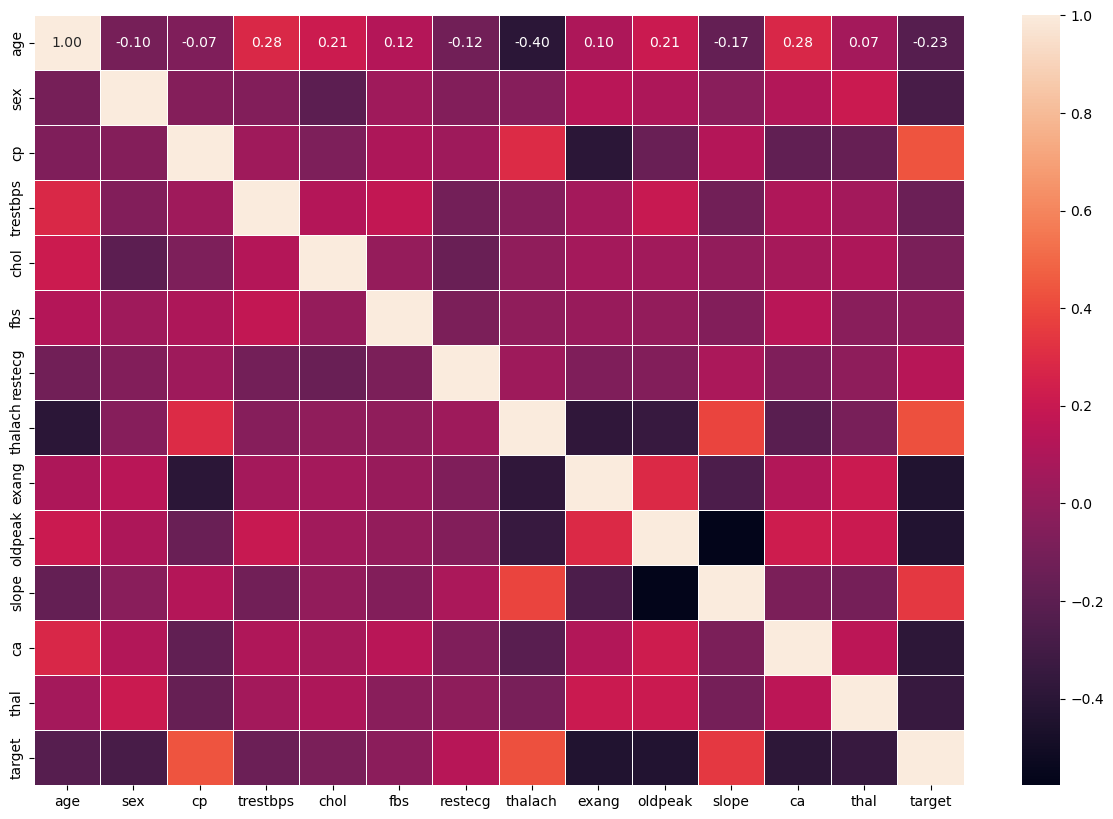

In [14]:
# visualising correlation matrix
corr_matix = df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matix,annot=True,
              linewidth=0.5,
              fmt=".2f"
              )

# 5 . Modelling

In [15]:
# data spliting into x and y
X= df.drop("target",axis=1)
Y= df["target"]

In [16]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [18]:
# spliting data into training and test 
np.random.seed(42)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

now the dataset is splited into training and testing i can create ml models using it .
models that i will use for this problem are 
* 1 logistic regression
* 2 K-nearest neighbours classifier
* 3 random forest classifier

In [19]:
models = {"Logistic Regression" :LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "random forest": RandomForestClassifier()}
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    np.random.seed(42)
    model_score ={}
    for name,model in models.items():
        model.fit(X_train,Y_train)
        model_score[name]=model.score(X_test,Y_test)
    return model_score


In [20]:
model_scores = fit_and_score(models,X_train,X_test,Y_train,Y_test)

E:\projects\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'random forest': 0.8360655737704918}

# making visual comparison for models

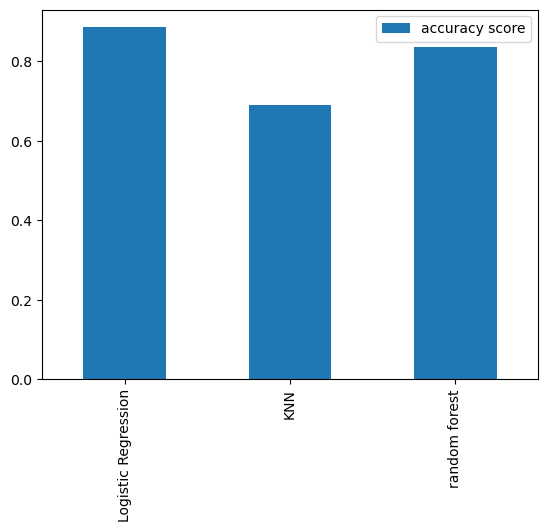

In [22]:
model_compare=pd.DataFrame(model_scores,index=["accuracy score"])
model_compare.T.plot.bar();

In [23]:
model_compare

,Logistic Regression,KNN,random forest
accuracy score,0.885246,0.688525,0.836066


# Evaluating all 3 models 

tuning and improving our models and finding the best amoung them by :- 

* hyperparameter tuning
* feature importance
* confusion matrix
* cross-validation
* precision 
* recall
* f1 score
* classification report
* ROC curve
* AUC are under the curve

# hyperparameter tuning

In [24]:
# KNN
train_scores=[]
test_scores=[]

neighbours= range (1,21)
knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,Y_train)
    
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))


Maximum KNN score on test data 75.41 %


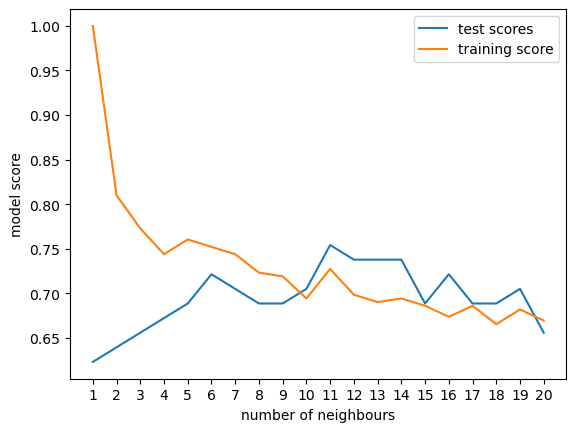

In [25]:
plt.plot(neighbours,test_scores,label="test scores")
plt.plot(neighbours,train_scores,label="training score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neighbours")
plt.ylabel("model score")
plt.legend();
print(f"Maximum KNN score on test data {max(test_scores)*100:.2f} %")

before tuning KNN had a score of 68% after tuning(n=11) its score reaches 75% accuracy on test data but it is still lower than other two models before they are even tuned  

# Tuning using RandomizedSearchCV
* logistic regression
* RandomForest classifier

In [26]:
# creating a hyper parameter grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
# hyperparameter grid for random forest classifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf": np.arange(1,20,2)}

In [27]:
# tuning logistic regression
np.random.seed(42)

# setting random hyperparameter search for logistic resgression
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
#fit random hyperparameter search model for log_reg
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [29]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

accuracy was about the same as before

tuning random forest model now

In [30]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,verbose=True)

rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [32]:
rs_rf.score(X_test,Y_test)

0.8688524590163934

In [33]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'random forest': 0.8360655737704918}

now the accuracy is increased from 0.83 to 0.86.
it is still lower than logistic regression
so now lets work on logistic regression and try to improve it

### tuning logistic regression with GridSearchCV

In [34]:
# hyperparameter grid for logistic Regression
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

gs_log_rg = GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
gs_log_rg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [35]:
gs_log_rg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [36]:
gs_log_rg.score(X_test,Y_test)

0.8852459016393442

In [37]:
model_compare

,Logistic Regression,KNN,random forest
accuracy score,0.885246,0.688525,0.836066


## so far even after tunning the best model is logistic Regression for our use case 

# Evalution for classification model
* ROC curve and AUC score
* Confusion matrix
* Classifiction report
* Precision
* Recall 
* F1-Score

In [38]:
y_preds = gs_log_rg.predict(X_test)

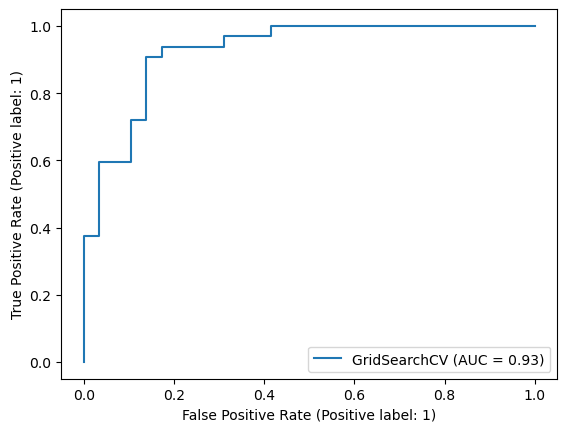

In [39]:
# ROC curve and AUC score
RocCurveDisplay.from_estimator(gs_log_rg,X_test,Y_test);


In [40]:
print(confusion_matrix(Y_test,y_preds))

[[25  4]
 [ 3 29]]


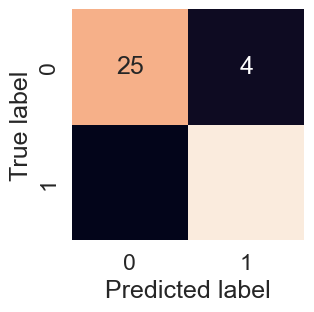

In [41]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(Y_test, y_preds)

 now classification report , cross-validation precision, recall,f1 score

In [43]:
# classification on 1 instance of training and testing data
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



###### calculating evaluation metrics using  cross-validation

In [44]:
gs_log_rg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
clf=LogisticRegression(C=0.20433597178569418,
                      solver='liblinear')

In [50]:
# cross-validated accuracy
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")

In [51]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [52]:
# cross-validated precision
cv_pre=cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre

0.8207936507936507

In [53]:
# cross-validated recall
cv_recall=cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [54]:
# cross validated  f1 score
cv_f1=cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

In [60]:
cv_metrics=pd.DataFrame({"accuracy":cv_acc,
                        "precison":cv_pre,
                        "recall":cv_recall,
                        "F1":cv_f1},index=[0])

In [59]:
cv_metrics

,accuracy,precison,recall,F1
0,0.844699,0.820794,0.921212,0.867301


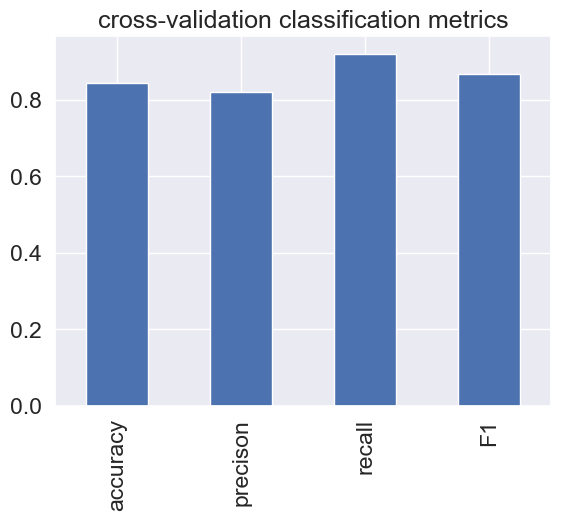

In [64]:
cv_metrics.T.plot.bar(title="cross-validation classification metrics",legend=False);

### Finding most important features

In [65]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [68]:
clf=LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [69]:
clf.fit(X_train,Y_train);

In [70]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [71]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

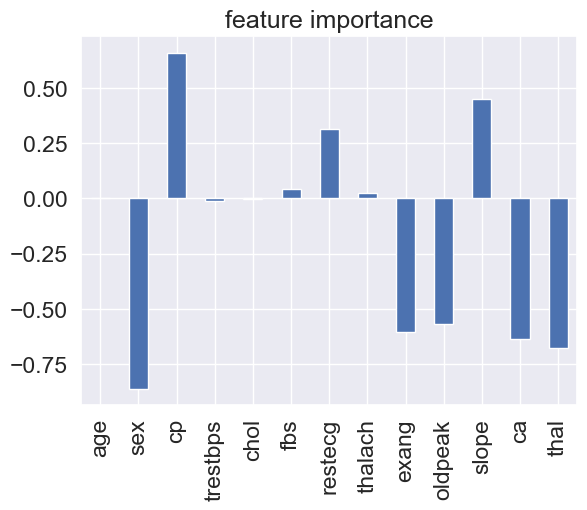

In [74]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="feature importance",legend=False);

In [76]:
gs_log_rg

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [79]:
import pickle

pickle.dump(gs_log_rg,open("logistic_model.pkl","wb"))